In [1]:
import numpy as np
import matplotlib.pyplot as plt
import field
import spatial
import timesteppers
import scipy.sparse.linalg as spla
from scipy import sparse

from timesteppers import *

from field import *
from spatial import FiniteDifferenceUniformGrid

%matplotlib inline

### $ \frac{\partial p}{\partial t} = - \frac{\partial}{\partial x} [ \mu(x,t) p(x,t) ] + \frac{\partial^2}{\partial x^2} [ D(x,t) p(x,t) ]$

In [2]:
#IMEX scheme for 1D Fokker-Planck equation

class FK1D_IMEX:
    
    def __init__(self, p, D, mu,spatial_order=4):
        
        self.grid=p.grid
        
        self.X = FieldSystem([p])
        
        pt = Field(self.grid)
        
        dx = FiniteDifferenceUniformGrid(1, spatial_order, p*mu)
        dx2 = FiniteDifferenceUniformGrid(2, spatial_order, p*D)
        
        LHS = pt - dx2
        
        self.M = LHS.field_coeff(pt)
        self.L = LHS.field_coeff(p)
        
        self.F_ops = [-dx]

/home/fulya/packages/anaconda3/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


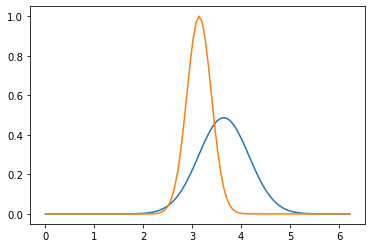

In [5]:
grid = field.UniformPeriodicGrid(100, 2*np.pi)
x = grid.values
p = field.Field(grid)

alpha = 0.2
mu = 0.5 #drift coefficient
D=0.1 #diffusion coefficient
dt = alpha*grid.dx
IC = np.exp(-(x-np.pi)**2*8)
p.data[:] = IC
FK = FK1D_IMEX(p,D,mu,spatial_order=4)
ts = timesteppers.CNAB(FK)
tmax = 1-1e-5
while ts.t < tmax:
    ts.step(dt)
   
plt.plot(x,p.data)
plt.plot(x,IC)

/home/fulya/packages/anaconda3/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


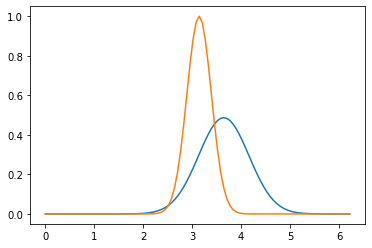

In [14]:
grid = field.UniformPeriodicGrid(100, 2*np.pi)
x = grid.values
p = field.Field(grid)

alpha = 0.5
mu = field.Array(grid,0.5*np.ones(p.data.shape)) #drift coefficient
D=field.Array(grid,0.1*np.ones(p.data.shape))#diffusion coefficient
dt = alpha*grid.dx
IC = np.exp(-(x-np.pi)**2*8)
p.data[:] = IC
FK = FK1D_IMEX(p,D,mu,spatial_order=4)
ts = timesteppers.CNAB(FK)
tmax = 1-1e-5
while ts.t < tmax:
    ts.step(dt)
   
plt.plot(x,p.data)
plt.plot(x,IC)
